# [LAB 06] . 데이터 분포 시각화
### 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb

### 그래프 초기화

In [4]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트의 이름만 추출
plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [5]:
origin = load_data("wage")
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [6]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [ ]:
# 결측치 확인
origin.isnull().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [12]:
# 명목형 타입 변환
df1 = origin.astype({'year': 'category', 'maritl': 'category',
'race': 'category', 'education': 'category', 'region':
'category', 'jobclass': 'category', 'health': 'category',
'health_ins': 'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


#### 전처리 과정에서 명목형으로 변경된 변수는 요약통계량에서 자동으로 제외된다.

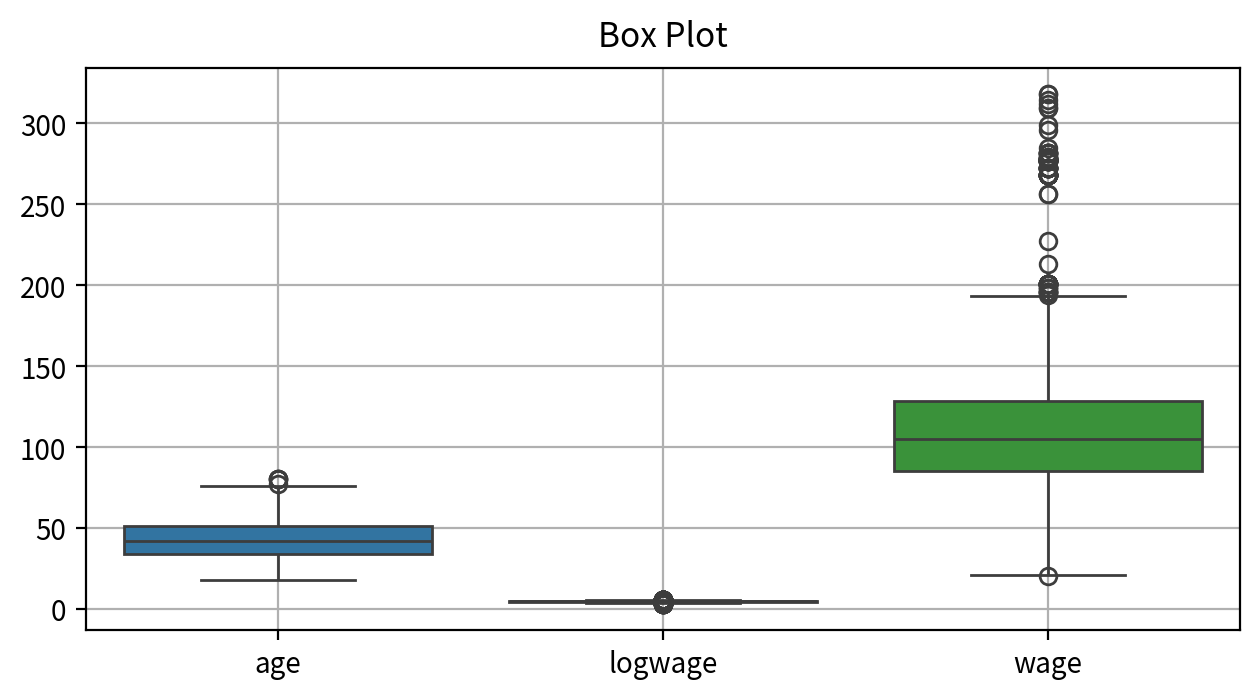

In [14]:
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df1)
# 3) 그래프 꾸미기
ax.set_title("Box Plot", fontsize=12, pad=8)
ax.grid(True) # 배경 격자 표시/숨김
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

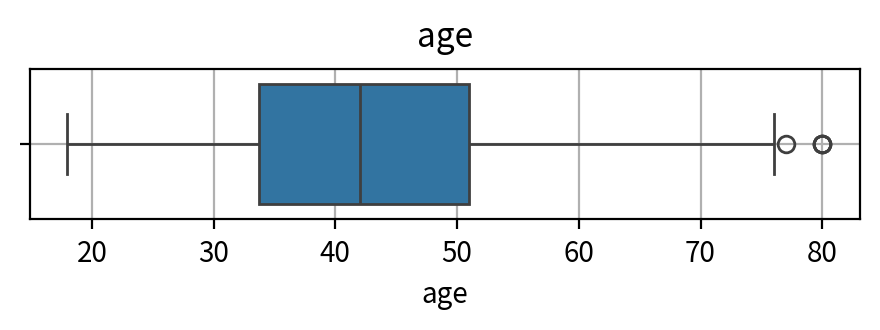

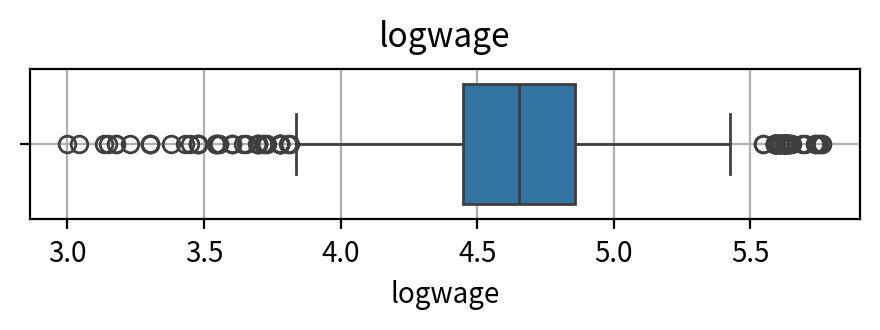

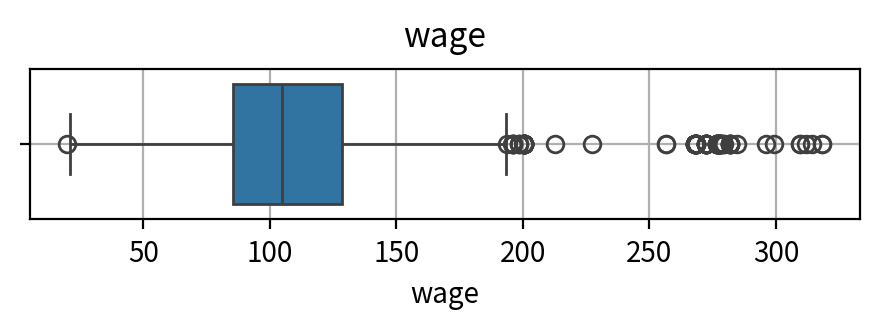

In [15]:
fields = ['age', 'logwage', 'wage']
for f in fields:
    # 1) 그래프 초기화
    width_px = 900 # 그래프 가로 크기
    height_px = 350 # 그래프 세로 크기
    rows = 1 # 그래프 행 수
    cols = 1 # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
    # 2) BoxPlot 그리기
    sb.boxplot(data=df1, x=f)
    # 3) 그래프 꾸미기
    ax.set_title(f, fontsize=12, pad=8)
    ax.grid(True) # 배경 격자 표시/숨김
    # 4) 출력
    plt.tight_layout() # 여백 제거
    plt.show() # 그래프 화면 출력
    plt.close() # 그래프 작업 종료

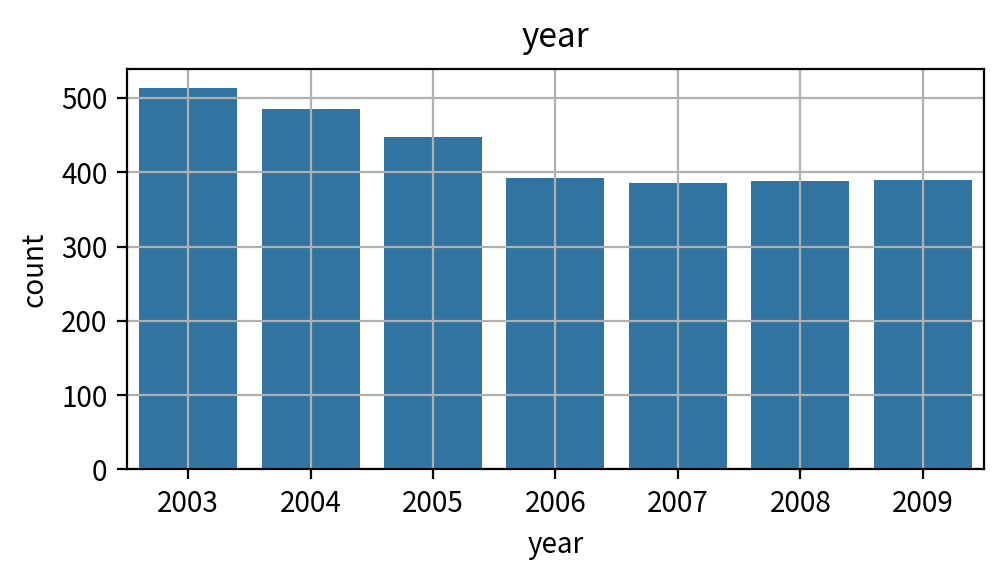

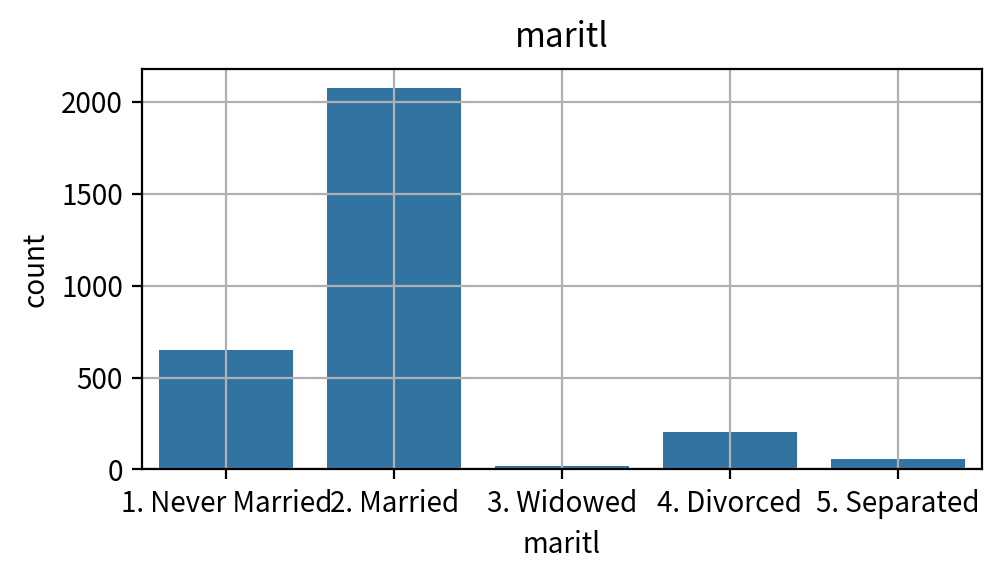

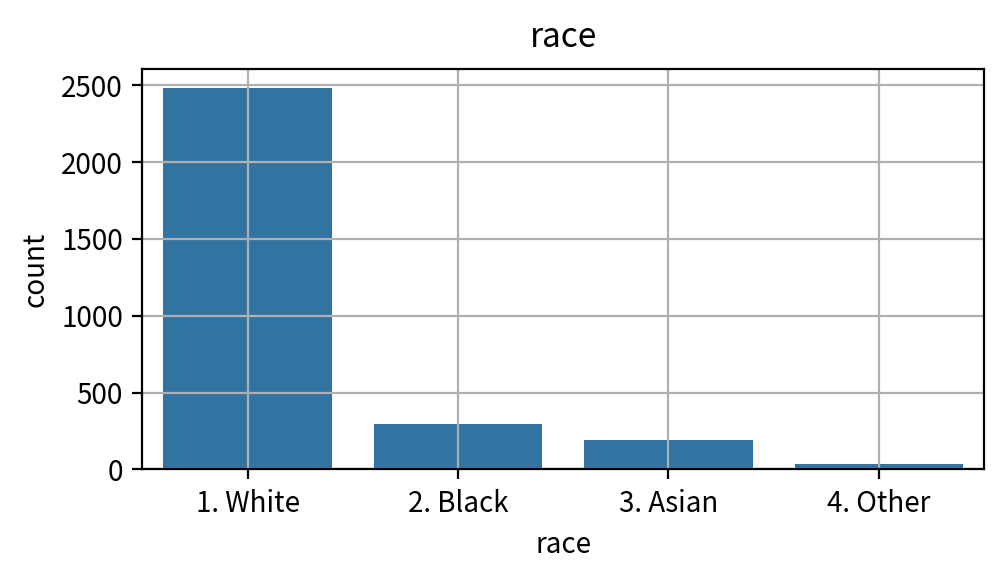

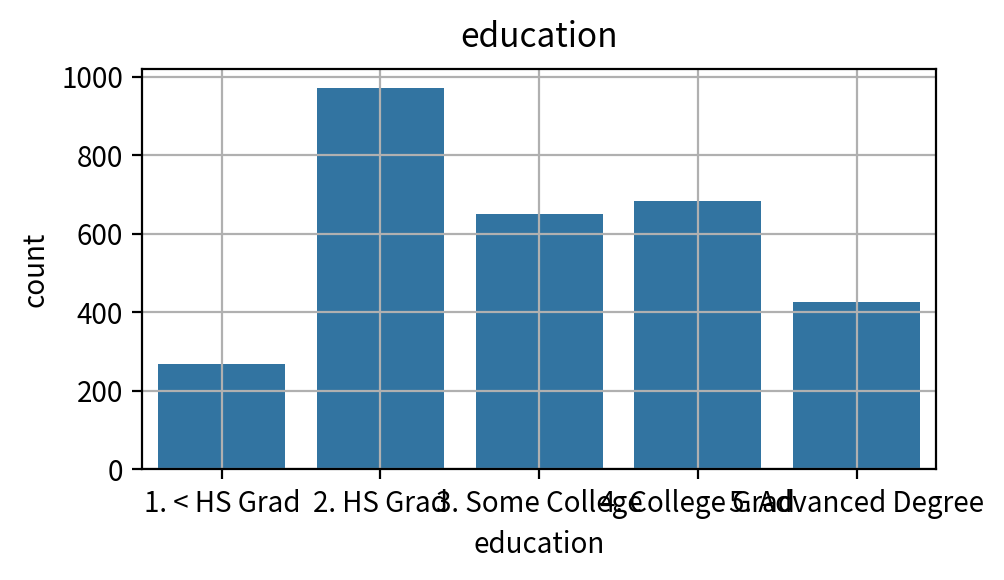

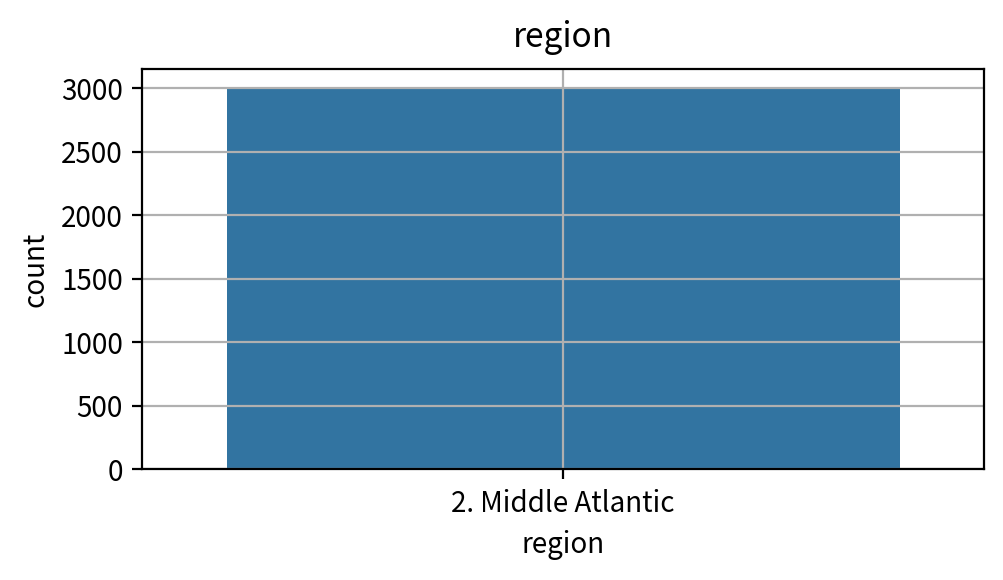

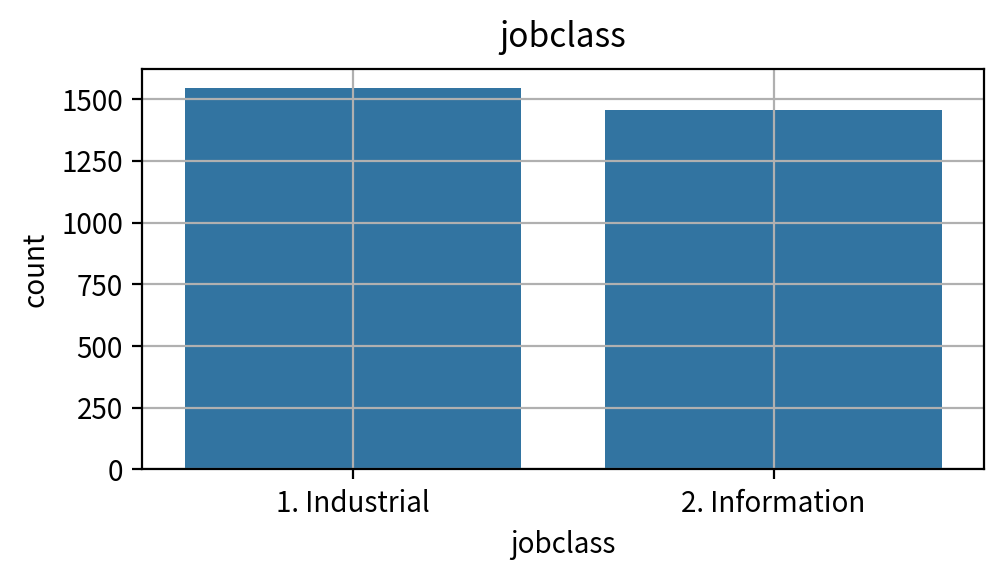

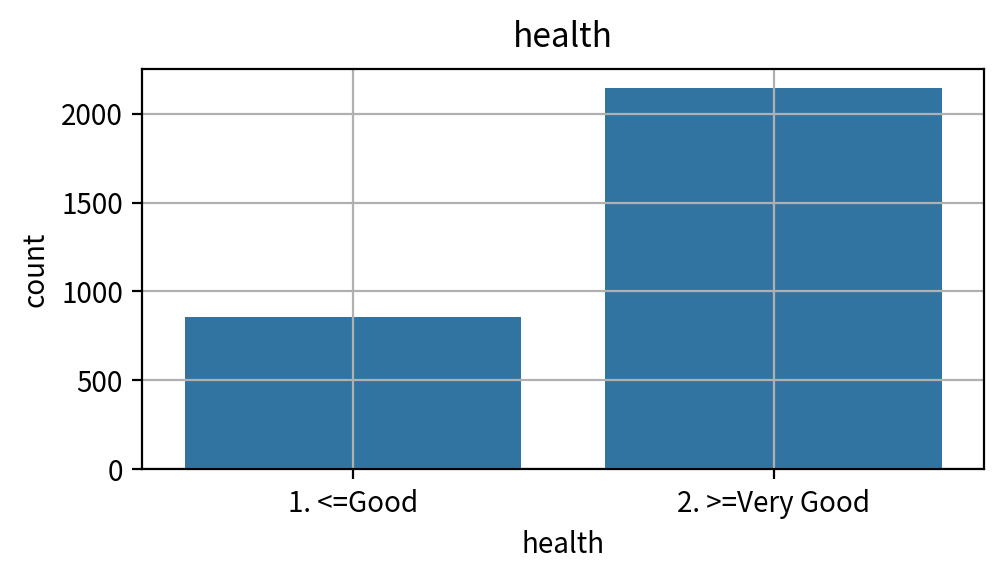

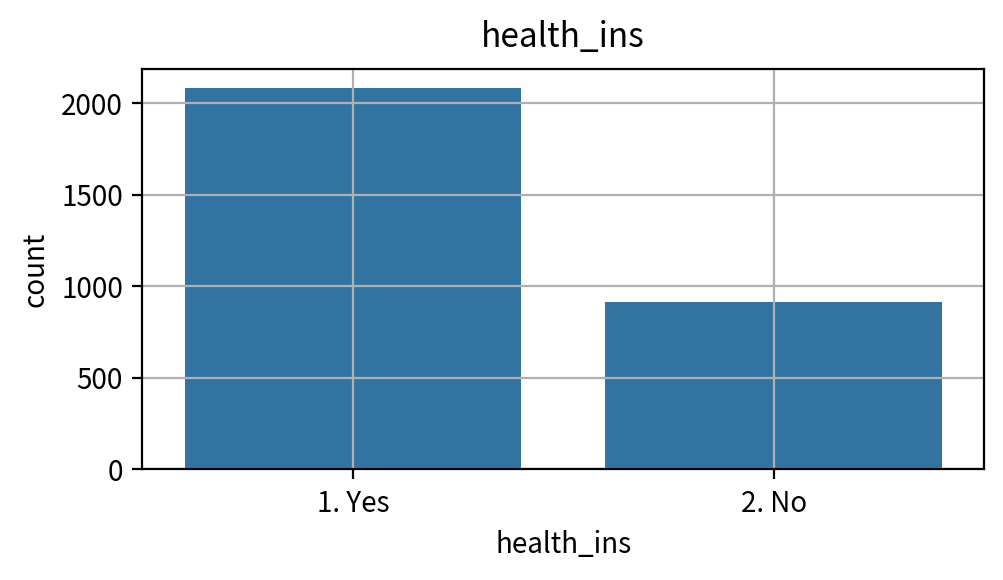

In [16]:
fields = ['year', 'maritl', 'race', 'education', 'region',
'jobclass', 'health', 'health_ins']
for f in fields:
    # 1) 그래프 초기화
    width_px = 1024 # 그래프 가로 크기
    height_px = 600 # 그래프 세로 크기
    rows = 1 # 그래프 행 수
    cols = 1 # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
    # 2) CountPlot 그리기
    sb.countplot(data=df1, x=f)
    # 3) 그래프 꾸미기
    ax.set_title(f, fontsize=12, pad=8)
    ax.grid(True) # 배경 격자 표시/숨김
    # 4) 출력
    plt.tight_layout() # 여백 제거
    plt.show() # 그래프 화면 출력
    plt.close() # 그래프 작업 종료

In [17]:
married = sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

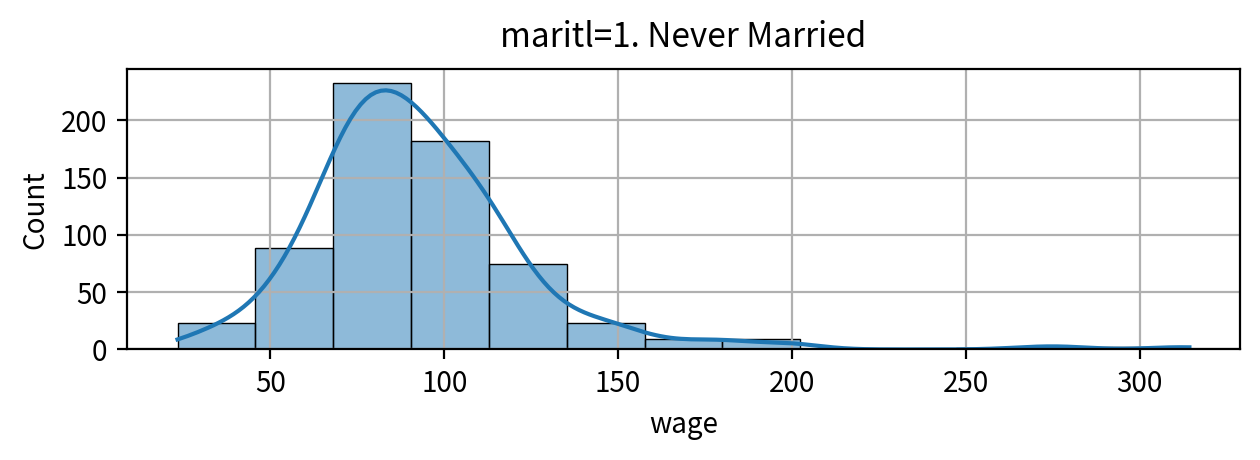

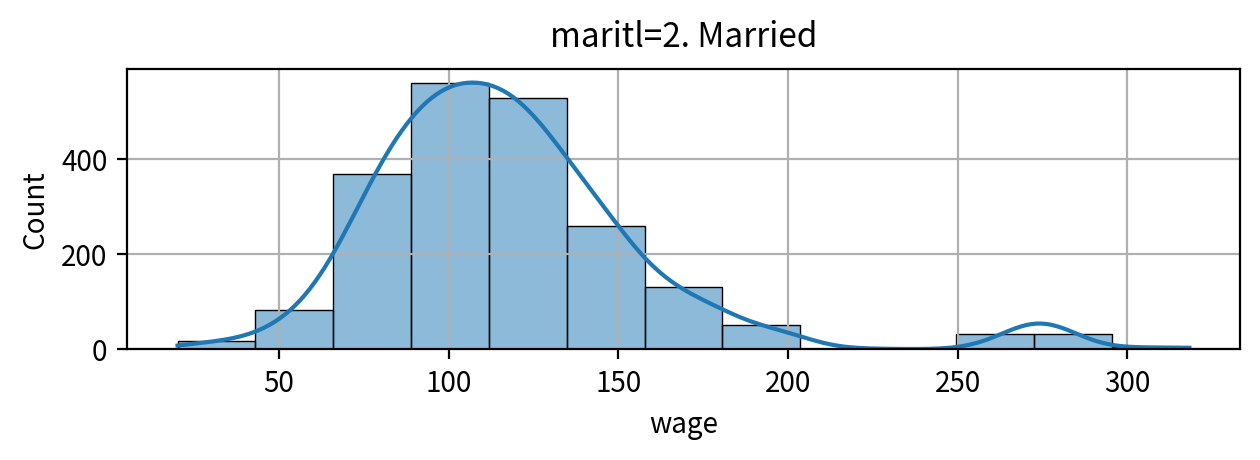

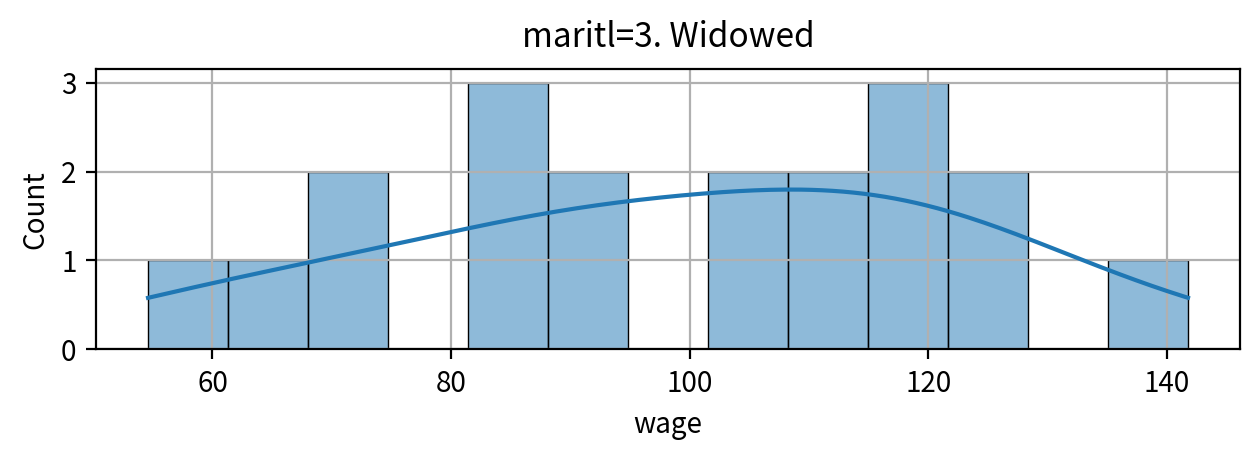

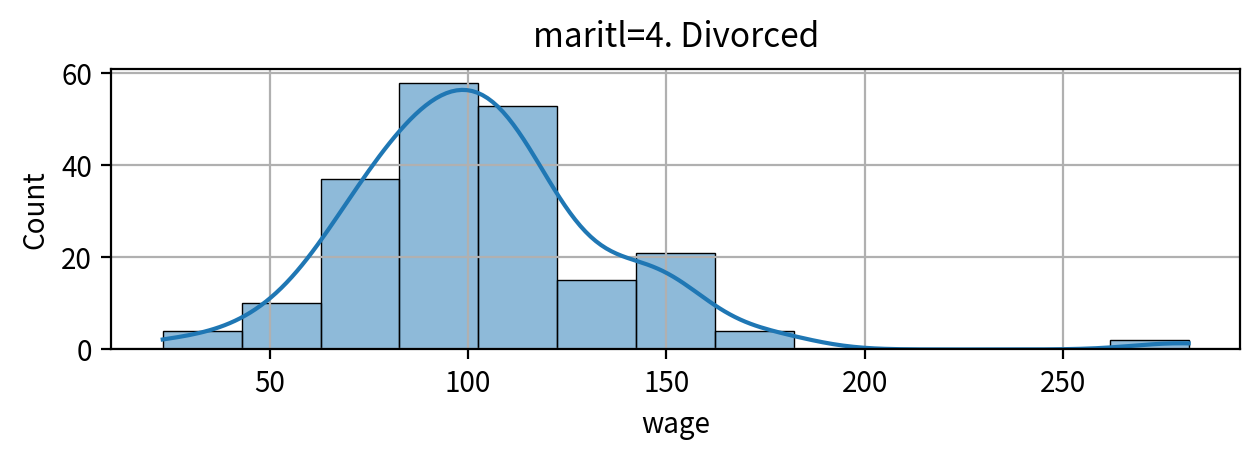

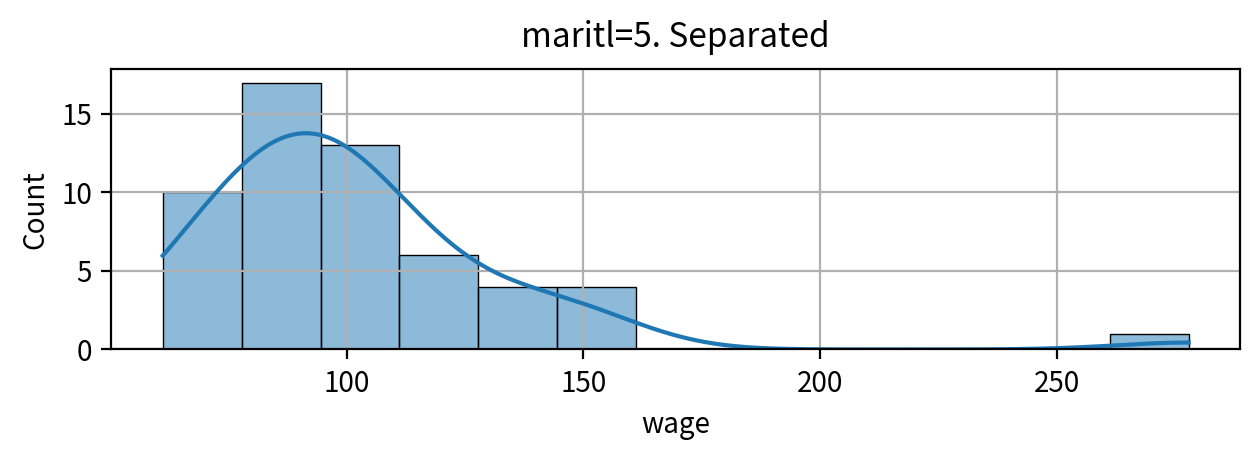

In [21]:
bins_count = 13 # 13개 구간으로 나누기
for m in married:
    mdf = df1.query("maritl == @m")
    # 1) 그래프 초기화
    width_px = 1280 # 그래프 가로 크기
    height_px = 480 # 그래프 세로 크기
    rows = 1 # 그래프 행 수
    cols = 1 # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
    # 2) KDE Plot 그리기
    sb.histplot(data=mdf, x="wage", bins=bins_count,
    edgecolor="#000000", linewidth=0.5, kde=True)
    # 3) 그래프 꾸미기
    ax.set_title("maritl=%s" % m, fontsize=12, pad=8)
    ax.grid(True) # 배경 격자 표시/숨김
    # 4) 출력
    plt.tight_layout() # 여백 제거

In [22]:
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

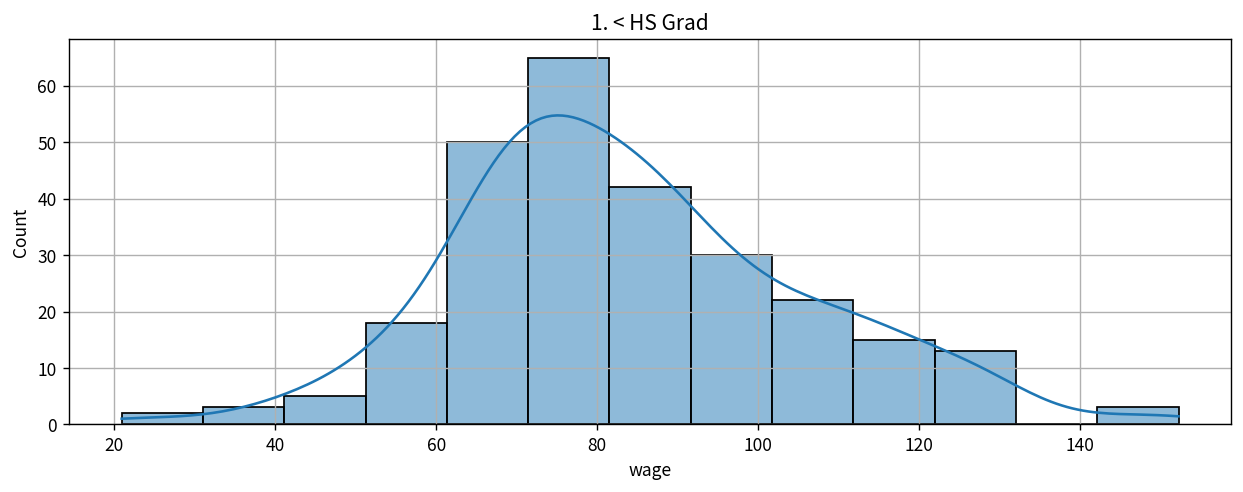

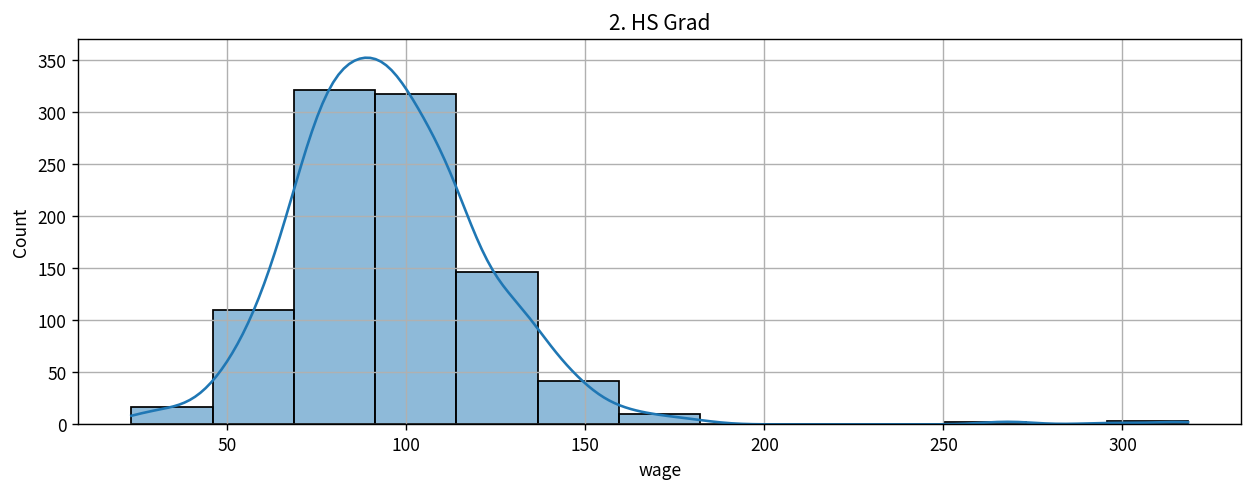

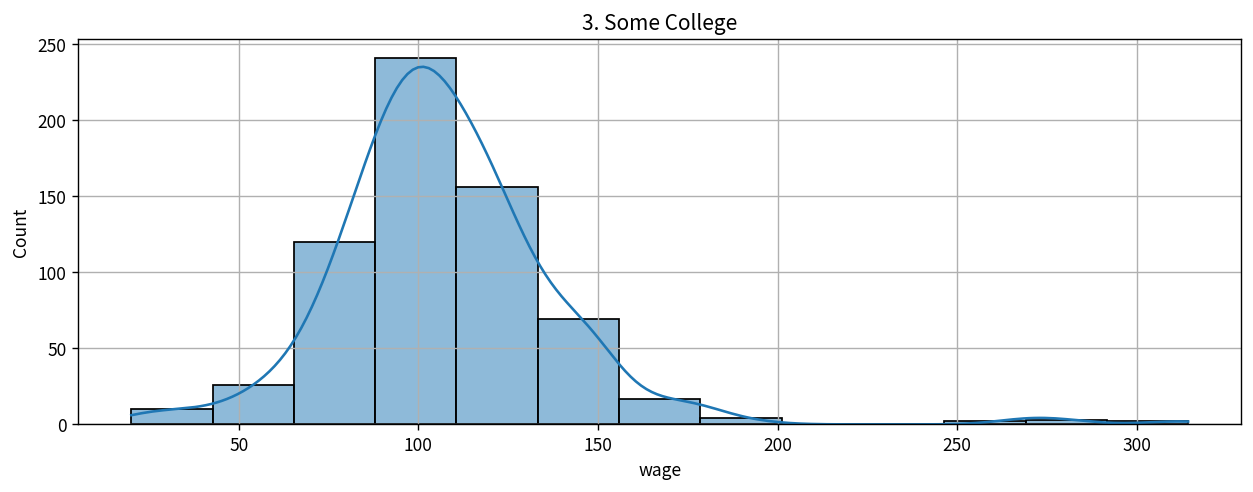

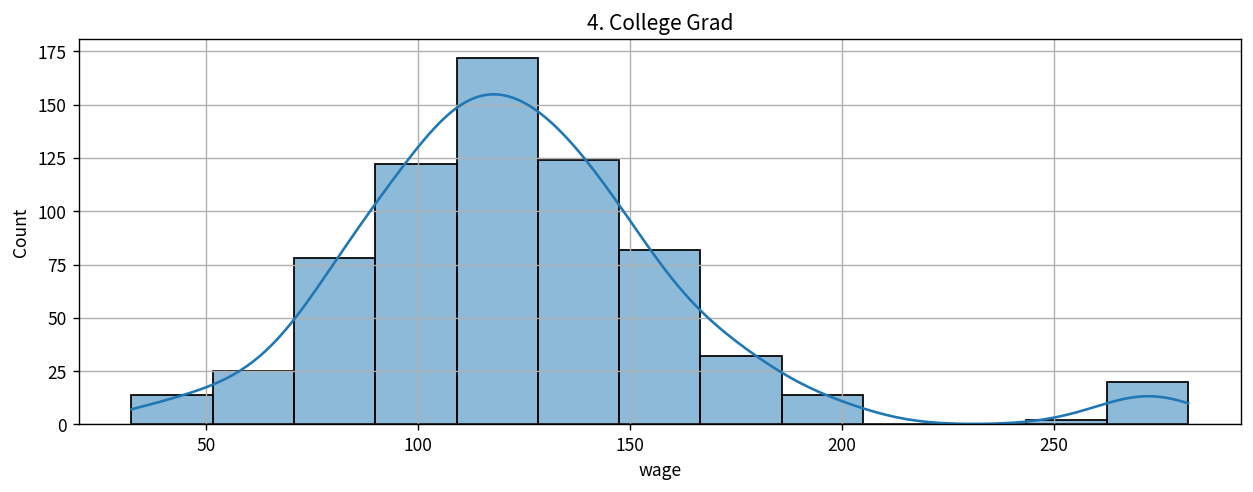

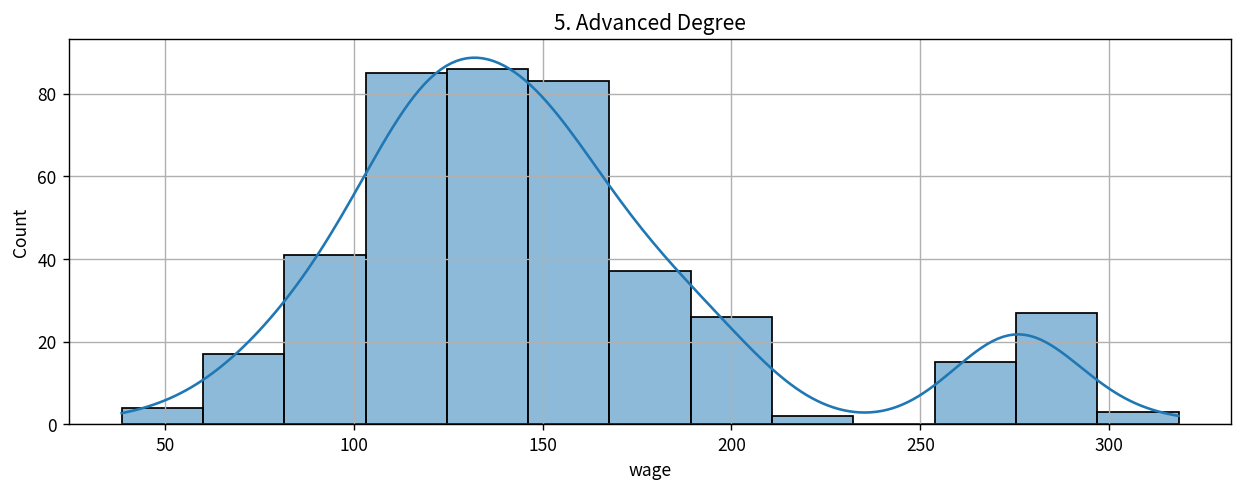

In [23]:
bins_count = 13 # 13개 구간으로 나누기
for e in education:
    mdf = df1.query("education == @e")
    plt.figure(figsize=(12, 4), dpi=125)
    sb.histplot(data=mdf, x='wage', bins=bins_count, kde=True)
    plt.title(e)
    plt.grid()
    plt.show()
    plt.close()

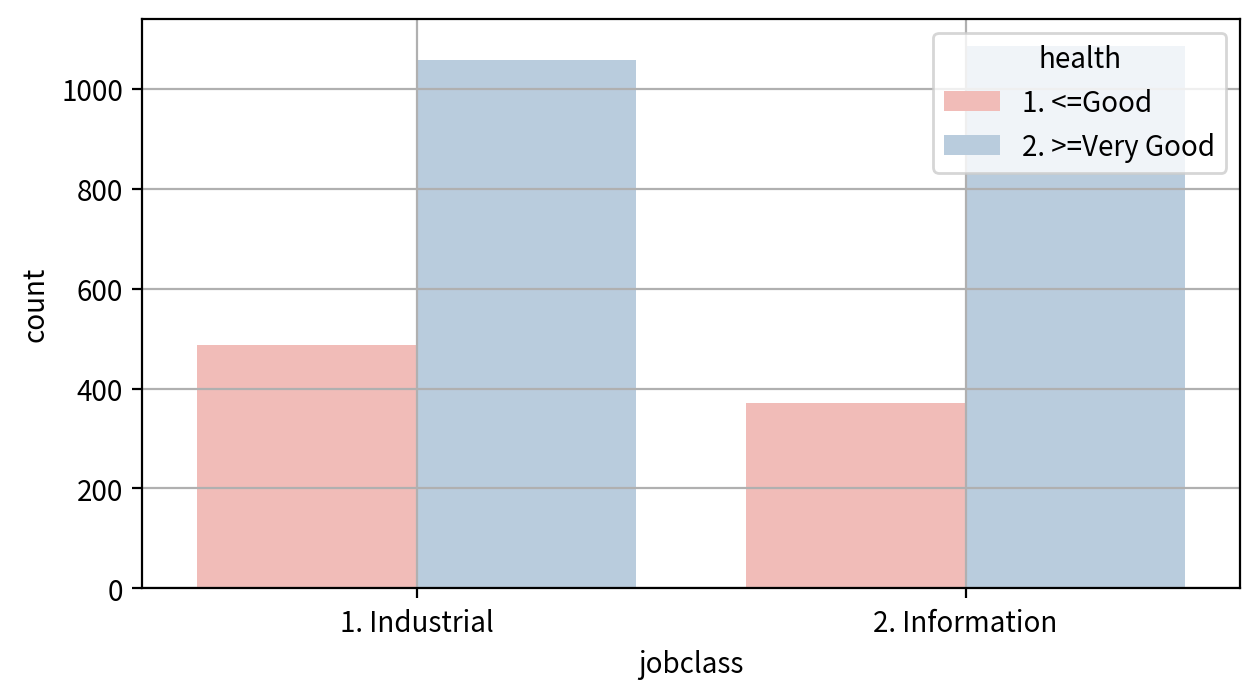

In [24]:
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) CountPlot 그리기
sb.countplot(data=df1, x="jobclass", hue="health", palette="Pastel1")
# 3) 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료